# Simple RNN

In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

import matplotlib.pyplot as plt
%matplotlib inline


## Generate Dataset
**Generate a sin series with additional noise**

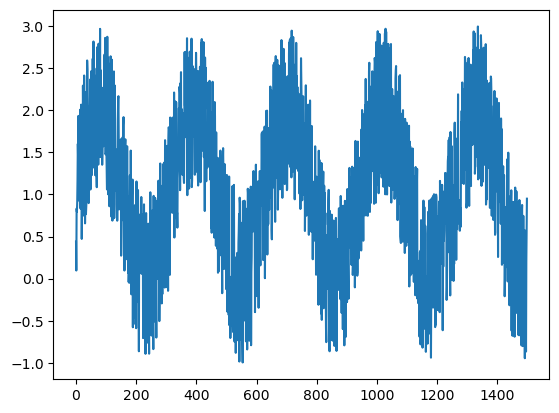

In [2]:
t = np.arange(0, 1500)
x = np.sin(0.02 * t) + np.random.rand(1500) *2
# x = np.sin(0.02 * t) + np.random.rand(1500)  *5
plt.plot(x)

### Split Tarin and test set
**Select first 1000 element as train set, and the rest as test set**

In [3]:
train, test = x[:1000], x[1000:]

### Prepare data: Create Data and labels
**NOTE: it is important for RNN to input data as a series, so a step must be consider for RNN**
**We have to open time steps to solve the problem = Create bunch of time seriese which is known as unRoll**

In [4]:
step =10

# convert into daaset and labels
def convertToDataset(data, step):
#     data = np.append(data, np.repeat(data[-1,], step))
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d,])
        y.append(data[d,])
        
    return np.array(x), np.array(y)


In [5]:
trainX, trainy= convertToDataset(train, step)
testX, testy= convertToDataset(test, step)


In [6]:
print(trainX.shape)
print(trainy.shape)

print(testX.shape)
print(testy.shape)



(990, 10)
(990,)
(490, 10)
(490,)


## Modify data dimention to input into RNN
### RNN Input type in Keras is like:
**(Number of Sequences, TimeSteps, Element perStep [Features])**<br/>
**(Mini-Batch, unRoll,  number of Features)**


In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [8]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


## Model Architecture and compile
**Number of units = Hidden State Neurons**

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [11]:
history = model.fit (trainX, trainy, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
62/62 - 1s - loss: 0.4535 - 512ms/epoch - 8ms/step
Epoch 2/100
62/62 - 0s - loss: 0.3954 - 59ms/epoch - 952us/step
Epoch 3/100
62/62 - 0s - loss: 0.4058 - 61ms/epoch - 982us/step
Epoch 4/100
62/62 - 0s - loss: 0.3895 - 58ms/epoch - 935us/step
Epoch 5/100
62/62 - 0s - loss: 0.3914 - 62ms/epoch - 996us/step
Epoch 6/100
62/62 - 0s - loss: 0.3837 - 62ms/epoch - 1ms/step
Epoch 7/100
62/62 - 0s - loss: 0.3878 - 59ms/epoch - 954us/step
Epoch 8/100
62/62 - 0s - loss: 0.3844 - 58ms/epoch - 942us/step
Epoch 9/100
62/62 - 0s - loss: 0.3710 - 60ms/epoch - 975us/step
Epoch 10/100
62/62 - 0s - loss: 0.3802 - 59ms/epoch - 955us/step
Epoch 11/100
62/62 - 0s - loss: 0.3811 - 59ms/epoch - 950us/step
Epoch 12/100
62/62 - 0s - loss: 0.3723 - 59ms/epoch - 957us/step
Epoch 13/100
62/62 - 0s - loss: 0.3742 - 58ms/epoch - 935us/step
Epoch 14/100
62/62 - 0s - loss: 0.3697 - 62ms/epoch - 996us/step
Epoch 15/100
62/62 - 0s - loss: 0.3668 - 59ms/epoch - 954us/step
Epoch 16/100
62/62 - 0s - loss: 0.365

In [12]:
# Must specify input shape or fit the model before run this command
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
